# Instalando dependências

In [16]:
%pip install pandas
%pip install matplotlib
%pip install -U google-generativeai
%pip install python-decouple
%pip install python-dotenv
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
  Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Criando um promt para a classificação

In [27]:
import google.generativeai as genai
from decouple import config
from dotenv import load_dotenv
import typing_extensions as typing
import json

load_dotenv()

genai.configure(api_key=config("GEMINI_KEY"))

class Classification(typing.TypedDict):
    result: str


def generate_news_classification(news_title: str) -> Classification:

    prompt = f"""
    <sentment_classifier>
        You are a assistant created to emulate the best sentiment analysis model in the world. 
    <sentment_classifier>

    1. Allways respond in JSON format.
    2. Do not take a political stance on the classification.
    3. Always chose one of the following classes: positive, negative, neutral.

    <example>
        <news>Acidente em rodovia Ônibus capota em ribanceira e deixa 17 mortos na Serra da Barriga, em Alagoas</news>
        negative
    </example>

    <example>
        <news>Hezbollah dispara mais de 180 foguetes contra Israel após ataques que deixaram 29 mortos em Beirute</news>
        negative
    </example>

    <example>
        <news>Mulheres mais baixa e mais alta do mundo se encontram no Reino Unido</news>
        neutral
    </example>

    <example>
        <news>Prefeitura do Rio anuncia atrações para Réveillon</news>
        positive
    </example>

    <example>
        <news>Fazenda aumenta para 3,3% estimativa para o PIB este ano</news>
        positive
    </example>

    <news>{news_title}<news>
    """

    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt, generation_config=genai.GenerationConfig(response_mime_type="application/json", response_schema = Classification))

    return json.loads(response.text)

### Using the classifier on real news

In [28]:
import requests
from bs4 import BeautifulSoup

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
}

news_home = requests.get("https://pdt.org.br/index.php/category/nacional/", headers=headers).text
news_soup = BeautifulSoup(news_home, 'html.parser')

news_titles = news_soup.find_all("h3", class_="entry-title")
news_titles = [news_title.text for news_title in news_titles]

### Classificando todas as noticias com o GEMINI

In [33]:
data = [{"title": news_title, "classification": generate_news_classification(news_title)['result']} for news_title in news_titles]

In [34]:
data

[{'title': 'Exposição imersiva sobre Abdias Nascimento celebra o seu legado',
  'classification': 'positive'},
 {'title': 'Darcy Ribeiro é Inscrito no Livro dos Heróis e Heroínas da Pátria',
  'classification': 'positive'},
 {'title': 'Amigo do PDT, Arthur Moreira Lima morre aos 84 anos',
  'classification': 'negative'},
 {'title': 'Documentário aponta Reformas de Base como necessárias, mesmo 60 anos depois',
  'classification': 'neutral'},
 {'title': 'PDT lança cartilha Gestão Trabalhista com diretrizes estratégicas de boa governança para os seus candidatos',
  'classification': 'positive'},
 {'title': '“Vargas, a transformação do Brasil” será exibido nas TVs Legislativas do Senado e da Câmara Federal',
  'classification': 'neutral'},
 {'title': 'PDT fortalece laços diplomáticos com governo do Vietnã em Brasília (DF)',
  'classification': 'neutral'},
 {'title': 'PDT atualiza seu Estatuto para fortalecer compromissos democráticos e de transparência',
  'classification': 'positive'},
 {

<Axes: xlabel='classification'>

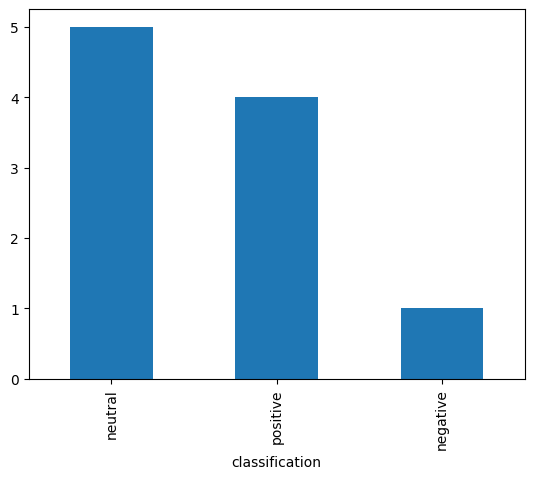

In [36]:
import pandas as pd

df = pd.DataFrame(data)
df['classification'].value_counts().plot(kind='bar')